# 2021-06-08 Spatial data - Student Notebook



## Goals for today
**Scientific Goals:**
- Be comfortable loading, plotting and manipulating gridded data
- Understand how to weight gridded data
- Data organization

**Coding Skills:**
- Use linux commands: wget, unzip, ncdump, cdo gridarea
- Be able to quickly plot data directly from xarray
- Output NetCDF files
- Use masks

## Notebook Overview
**1. Download data:**
* 1.1 Download NetCDF file using `wget` (linux)
* 1.2 Unzip NetCDF file using `unzip` (linux)
* 1.3 Look at the data (linux `ncdump` and `xarray`)
* 1.4 Make some basic plots of the data (`xarray` and `cartopy`)

**2. Compute regional averages**
* 2.1 Subset your data by selecting a month and time range using `xarray`
* 2.2 Compute grid area (`cdo`), weight the data and produce a time series plot
* 2.3 Save this data to NetCDF

**3. Look at the data with a Hovmuller plot**
* 3.1 Make a longitude average
* 3.2 Compute and plot data across seasons
* 3.3 Play around with different color maps and sine weightings (extension)

In [1]:
#import libraries and define useful lists
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime
import cartopy.crs as ccrs
import os

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

## 1. Download the data
**We'll be using HadCRUT5 which is a gridded observational surface temperature dataset from the Met Office and University of East Anglia. <br>
You can find the files you're able to download from [their website](https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/download.html) along with documentation<br>
Below is a comparison between global temperature datasets, of which HadCRUT5 is one**<br>
<img src="https://www.metoffice.gov.uk/hadobs/hadcrut5/figures/HadCRUT5_figure_7.png" alt="HadCRUT5 time series" width="1000"/>


## 1.1 `wget` (Linux)

**Let's first have a look where we are, using linux terminal within Jupyter**

In [1]:
!pwd

/Users/atoc_reu_student/Downloads/Python Bootcamp/Day 6


**If you want to change your working directory, with Python, use:** <br>
`os.chdir(<new/path>)` <br> <br>
**Now we will use 'wget', this downloads data from a URL. Use the 'help' flag** `!wget --help` **to print useful information about a Linux command** <br>

<span style="color:blue">**Execute the cell below to download the HadCRUT NetCDF file**</span> <br>
**If you would like to download the file to a directory other than your current working directory, use the '-P' flag:** <br> 
`wget <URL> -P </path/to/folder>` <br>

In [2]:
!wget https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip

zsh:1: command not found: wget


**If you'd like to know the size of the file you're downlading (and other info) run:** `wget --spider <URL>` <span style="color:blue"> **Copy a link address on the [HadCRUT5 webite](https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/download.html) and try this**

## 1.2 `unzip` (Linux)
**Now let's check we have unzip installed, if so we should have the version number printed and a list of common commands**

In [4]:
!unzip

<span style="color:blue"> **Let's unzip the file we downloaded (HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip)** </span> <br>
**We can check this by runing the linux command** `ls -lh` <br> 
**This shows a list of files in the current working directory and lists them on a single line with human readable file sizes**

In [5]:
!unzip HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip

unzip:  cannot find or open HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip, HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip.zip or HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean_netcdf.zip.ZIP.


**Now let's check we've extracted this file properly**

In [2]:
!ls -lh

total 67600
-rw-r--r--@ 1 atoc_reu_student  staff   1.2M Jun  8 09:50 Day_6_Spaial_Data_Answers.html
-rw-r--r--@ 1 atoc_reu_student  staff   570K Jun  8 12:03 Day_6_Spatial_Data.ipynb
-rw-r--r--@ 1 atoc_reu_student  staff   914K Jun  8 09:50 Day_6_Spatial_Data_Answers.ipynb
-rw-r--r--@ 1 atoc_reu_student  staff   7.7K Jun  8 11:59 Day_6_Spatial_Data_Challenge.ipynb
-rw-r--r--@ 1 atoc_reu_student  staff    30M Jun  8 10:43 HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
-rw-r--r--  1 atoc_reu_student  staff    12K Jun  8 12:01 HadCRUT5_temp_anoms_1940_2020_01.nc
-rw-r--r--@ 1 atoc_reu_student  staff    38K Jun  8 11:40 HadCRUT_weights.nc
-rw-r--r--  1 atoc_reu_student  staff   145K Jun  8 11:54 Regional_T_anomalies_1940_2020_NH.png


## 1.3 Looking at the data (Python: `xarray`, Linux: `ncdump`)

<span style="color:blue">**Open the file with**</span> `xarray.open_dataset` **(N.B. we have imported xarray as** `xr`**)**

In [5]:
HadCRUT = xr.open_dataset('HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')

**Now let's have a look at the dataset,** <span style="color:blue"> **run the variable name. Then click on the two icons at the end of coordinates and data variables, also expand the attributes label** </span>

In [4]:
HadCRUT #print the xarray dataset

<xarray.Dataset>
Dimensions:           (bnds: 2, latitude: 36, longitude: 72, time: 2055)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-03-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (latitude, bnds) float64 ...
    longitude_bnds    (longitude, bnds) float64 ...
    realization_bnds  (bnds) int64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

**We can also use the command line tool** `ncdump` **to quickly look at a NetCDF file without having to use Python.** <br><br>
<span style="color:blue">**Try**</span> `ncdump -h <file>` <span style="color:blue">**to look at the file head, and**</span> `ncdump -c <file>` <span style="color:blue">**to look at the coordinates of the file**</span> <br>
**For more utilities see [the documentation](https://www.unidata.ucar.edu/software/netcdf/documentation/NUG/netcdf_utilities_guide.html#ncdump_guide) or use** `ncdump --help`


In [6]:
!ncdump -h HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc

netcdf HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean {
dimensions:
	time = 2055 ;
	latitude = 36 ;
	longitude = 72 ;
	bnds = 2 ;
variables:
	double tas_mean(time, latitude, longitude) ;
		tas_mean:_FillValue = -1.e+30 ;
		tas_mean:long_name = "blended air_temperature_anomaly over land with sea_water_temperature_anomaly" ;
		tas_mean:units = "K" ;
		tas_mean:cell_methods = "area: mean (interval: 5.0 degrees_north 5.0 degrees_east) time: mean (interval: 1 month) realization: mean" ;
		tas_mean:coordinates = "realization" ;
	double time(time) ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	double time_bnds(time, bnds) ;
	double latitude(latitude) ;
		latitude:axis = "Y" ;
		latitude:bounds = "latitude_bnds" ;
		latitude:units = "degrees_north" ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
	double latitude_bnds

**Looking at the data we find the coordinate 'realization' and the data variable 'realization_bnds'. Let's get rid of these from our data using the following code:** <br>
This dataset contains the mean of the 200 ensemble members (which show uncertainties), so the realization data is meaningless and confusing 

In [7]:
HadCRUT = HadCRUT.drop('realization')
HadCRUT = HadCRUT.drop('realization_bnds')

In [8]:
HadCRUT

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 36, longitude: 72, time: 2055)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-03-16T...
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tas_mean        (time, latitude, longitude) float64 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

## 1.4 Plot the data (`xarray` and `cartopy`) 
<span style="color:blue">**Plot the data (variable** `tas_mean` **) for specific year and month, have a play around with different times, you should find the further back you go the more missing data there is** </span>

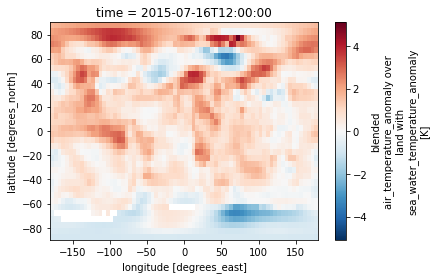

In [9]:
HadCRUT['tas_mean'].sel(time='2015-07').plot()

<span style="color:red">**Use your knowledge of cartopy from previous days to plot the same figure with coastlines and other features**</span>

# 2. Compute regional averages
## 2.1 Subset your data

**We'll first be looking at January for the period 1950-2020.** <span style="color:blue">**Later on you can see what happens is you change the month and time period** </span>

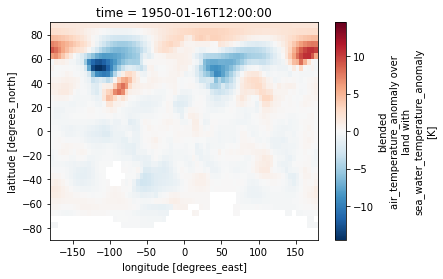

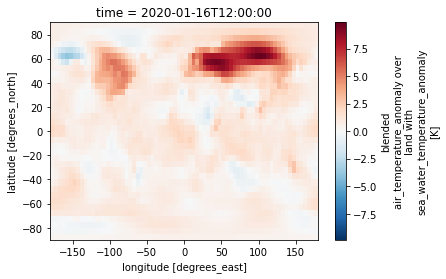

In [12]:
month_ = 1 #select which month you're interested in
start_yr = 1950 
end_yr   = 2020

#now select data for a reduced time period
month_HadCRUT = HadCRUT['tas_mean'].sel(time=HadCRUT['time.month']==month_).sel(time=slice(str(start_yr),str(end_yr)))

#plot the start and end years to make sure you've got the correct month (look at the title of the plots)
month_HadCRUT.sel(time=str(start_yr)).plot()
#See what happens if you comment out the next line (it should make a messy figure!)
plt.figure() #N.B if you want to make multiple plots in the same cell, make a new matplotlib figure instance.
month_HadCRUT.sel(time=str(end_yr)).plot(); #it's much cleaner to use the ; symbol after your last matplotlib command to stop text being printed

**We can see that the data is complete in the northern hemisphere back to at least 1950 for all grid cells** <br>
**Now we'll define 3 regions and plot the average temperature anomalies over the region - without weighting the grid cells**

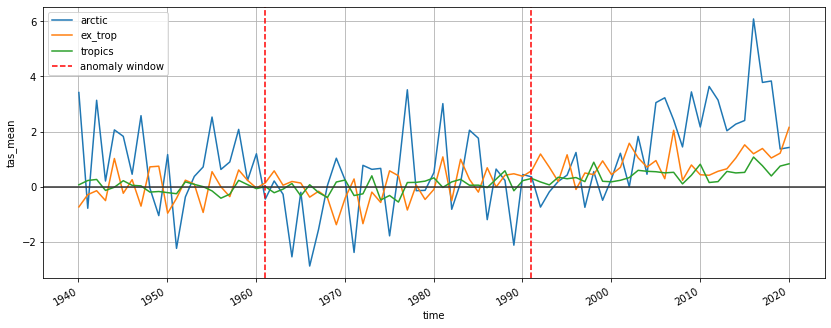

In [15]:
#Define a list of regions
region_list = ['arctic', 'ex_trop', 'tropics']

#Define a dictionary of latitude min and max for each region
lat_lim = {} #initialize a dictionary
lat_lim['arctic'] = [66.6,90] #the minimum and maximum latitude for that region
lat_lim['ex_trop'] = [23.5,66.6]
lat_lim['tropics'] = [-23.5,23.5]

#Compte the spatial mean. What is wrong with doing this? We are weighting all the grid cells equally
region_sum = {} #initialize a dictionary
for region in region_list:
    region_sum[region] = month_HadCRUT.sel(latitude=slice(lat_lim[region][0],lat_lim[region][1])).mean('longitude').mean('latitude')

    
#Plot the data you've made
plt.figure(figsize=[14,5]) #initialize a new figure instance of matplotlib

for region in region_list:
    region_sum[region].plot(label=region) #include the label so the legend can pick it up

#plot vertical lines at 1961 and 1990 which are the edges of the averaging period used to calculate the anomalies
#N.B. our dataset uses 'datetime64[ns]' times so we can't just plot the line at 1961 and 1990 - those years have to be in a time format
plt.axvline(datetime.datetime(1961,1,1), c='r', linestyle='--', label='anomaly window')
plt.axvline(np.datetime64('1990-12-31'), c='r', linestyle='--') #Note this takes np.datetime64 and the previous line took a datetime object

plt.grid() #plot grid lines
plt.axhline(0, c='0.2') #plot the 0 line
plt.legend(); #plot the legend, include ';' to stop text being printed

## 2.2 Weighting with `cdo gridarea` (Linux)
**The problem with doing what we have just done is that each of the grid cells are not weighted equally, especially in the Arctic** <br>
**This means that we need to find out the size of each of the grid cells and weight them** <br>
**We can do this by using the linux command** `cdo gridarea <infile> <outfile>` **as below. Documentation can be found [here](https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf)** <br><br>
*Note you'll get a warning due to the variable `realization`, it's issues like this why we dropped this variable earlier (but we didn't update the netcdf file)*

In [3]:
!cdo gridarea HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc HadCRUT_weights.nc 

zsh:1: command not found: cdo


In [21]:
weights

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 36, longitude: 72)
Coordinates:
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (longitude, bnds) float64 ...
    latitude_bnds   (latitude, bnds) float64 ...
    cell_area       (latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Tue Jun 08 10:37:00 2021: cdo gridarea HadCRUT.5.0.1.0.anal...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

**Now let's open up the grid cell area file and plot it, note the colorbar label tells you the units - we could also find this out by using** `ncdump` **or looking at the xarray variables as** `cdo` **provides coordinate labels**

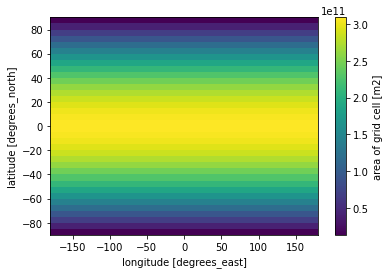

In [19]:
weights = xr.open_dataset('HadCRUT_weights.nc')
weights['cell_area'].plot();

**Let's try creating regional averages again, but this time we'll weight each of the regions' grid cells properly**

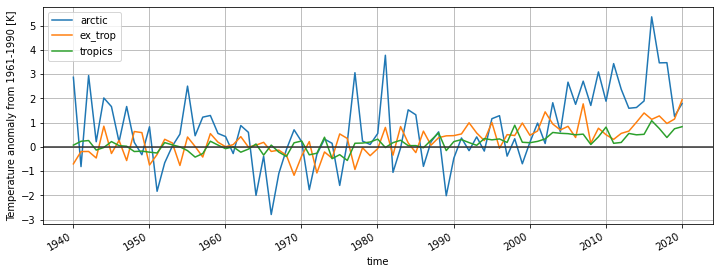

In [20]:
weighted_sums = {}
for region in region_list: #loop through the 3 regions
    
    #select the grid cell areas for the latitudes required for that region
    weights_lat_slice = weights['cell_area'].sel(latitude=slice(lat_lim[region][0],lat_lim[region][1]))
    #normalize this by dividing by the sum of all the grid cell areas in that region
    weight_region = weights_lat_slice/weights_lat_slice.sum()
    
    #now we can multiply the anomaly data (within the correct region) with the weights we just calculated
    weighted_grid_cells = month_HadCRUT.sel(latitude=slice(lat_lim[region][0],lat_lim[region][1])) * weight_region
    #sum across the latitude and longitude (but not time) to get a 2D aray of temperature anomaly and time
    weighted_sums[region] = weighted_grid_cells.sum('latitude').sum('longitude')

#plot the data you've made
fig = plt.figure(figsize=[12,4]) #initialize a new figure instance of matplotlib

for region in region_list: #loop through all 3 regions again
    weighted_sums[region].plot(label=region) #include the label so the legend can pick it up

plt.grid() #plot grid lines
plt.axhline(0, c='0.2') #plot the 0 line
plt.legend(); #plot the legend, include ';' to stop text being printed
plt.ylabel('Temperature anomaly from 1961-1990 [K]'); #we don't have automatic labels as we have multuplied the data

**Now we've labeled the figure above as** `fig` **we can now call this and the plot will appear, this can also be uesful for saving with** `fig.savefig(<file/path.png>)` 
<span style="color:blue"> **Try plotting this figure again in a new cell, and then saving it** </span> <br> N.B. to save the figure without cutting off any of the axes you may need to invoke `fig.tight_layout()`

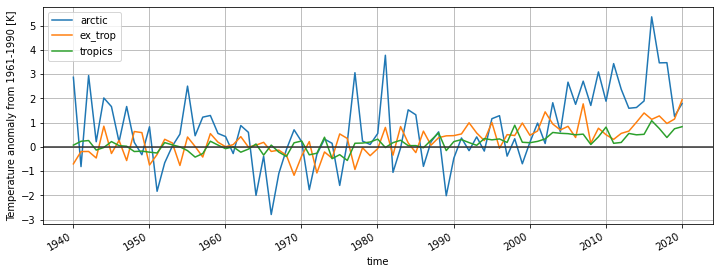

In [22]:
fig

In [23]:
fig.tight_layout() #if you don't include this you'll find the 'time' x-axis label is cut off
fig.savefig('Regional_T_anomalies_1940_2020_NH.png',dpi=150)

**Let's see what difference that weighting did**

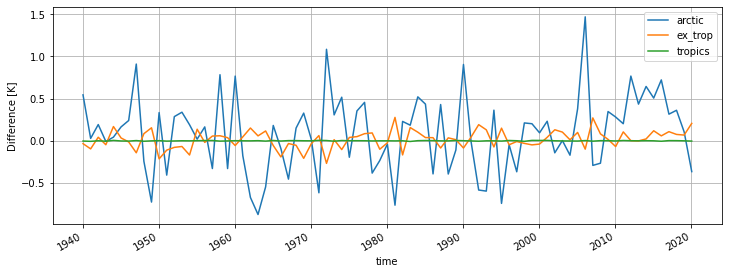

In [24]:
plt.figure(figsize=[12,4]) #initialize a new figure instance of matplotlib

#plot the difference weighting makes
for region in region_list:
    (region_sum[region]-weighted_sums[region]).plot(label=region) #include the label so the legend can pick it up

plt.ylabel('Difference [K]')
plt.grid()
plt.legend();

## 2.3 save the output data to NetCDF (`xarray`)
**Firstly we want to make an xarray dataset**

In [25]:
save_weighted_data = xr.Dataset(weighted_sums)

In [26]:
save_weighted_data

<xarray.Dataset>
Dimensions:  (time: 81)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-16T12:00:00 ... 2020-01-16T12:00:00
Data variables:
    arctic   (time) float64 2.871 -0.8092 2.943 0.2153 ... 3.472 1.261 1.789
    ex_trop  (time) float64 -0.6986 -0.1907 -0.1862 ... 0.9668 1.149 1.945
    tropics  (time) float64 0.07313 0.2328 0.2644 -0.129 ... 0.389 0.7491 0.8351

**For future use we need to add attributes as below. This allows us to:**
- Tell another person or ourselves at a later date what this dataset contains 
- Make it obvious to oursleves how we made the dataset (source data and what code created it
- When the dataset was created, this is especially important if there are multiple similar output files

In [18]:
save_weighted_data.attrs = {'Description' : 'Regional temperature anomalies for the month of {}, for years 1950-2020. Anomalies relative to 1961-1990'.format(month_names[month_-1]),
                            'Units' : 'Kelvin',
                            'Timestamp' : str(datetime.datetime.utcnow().strftime("%H:%M UTC %a %Y-%m-%d")),
                            'Source': 'Data - HadCRUT.5.0.1.0, doi:10.1029/2019JD032361. Analysis - REU_2021-06-08_Spatial_Analysis.ipynb'}

**Always check your file before saving**

In [27]:
save_weighted_data

<xarray.Dataset>
Dimensions:  (time: 81)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-16T12:00:00 ... 2020-01-16T12:00:00
Data variables:
    arctic   (time) float64 2.871 -0.8092 2.943 0.2153 ... 3.472 1.261 1.789
    ex_trop  (time) float64 -0.6986 -0.1907 -0.1862 ... 0.9668 1.149 1.945
    tropics  (time) float64 0.07313 0.2328 0.2644 -0.129 ... 0.389 0.7491 0.8351

**Always make sure you select a useful and unambiguous name for your data, if you're creating multiple files think about how they will be sorted alphabetically**

In [28]:
save_weighted_data.to_netcdf('HadCRUT5_temp_anoms_{}_{}_{}.nc'.format(start_yr, end_yr, str(month_).zfill(2))) #use zfill so months sort

**Now check your output with ncdump. [See documentation](https://www.unidata.ucar.edu/software/netcdf/documentation/NUG/netcdf_utilities_guide.html#ncdump_guide)**

In [19]:
!ncdump -h  HadCRUT5_temp_anoms_1950_2020_01.nc

# 3 Make a Hovmöller diagram (`xarray` and `cartopy`)
## 3.1 Make a longitude average

**Now we'll be using the full dataset again and take the mean across latitude to get 2D data (time, latitude)**

In [20]:
HadCRUT_lon_av = HadCRUT['tas_mean'].mean('longitude', skipna=True)

In [21]:
HadCRUT_lon_av

In [22]:
HadCRUT_lon_av.plot();

**We can get latitude on the y axis to improve readabilit by transposing the data. Making these plot manually in matplotlib takes a lot more work than with xarray**

In [23]:
HadCRUT_lon_av.transpose().plot();

## 3.2 Compute and plot data across seasons
**Now let's just select winter (DJF).** <span style="color:blue">**Have a go with the other seasons**

In [24]:
HadCRUT_season_lon_av = HadCRUT_lon_av.groupby('time.season').mean('time')
HadCRUT_season_lon_av.sel(season='DJF').plot();

**Now instead of making a mean across the time dimension, we want to look at the time and latitude**

In [25]:
HadCRUT_DJF_lon_av = HadCRUT_lon_av.sel(time=HadCRUT_lon_av['time.season']=='DJF')
HadCRUT_DJF_lon_av.transpose().plot();

## 3.3 Play around with the Hovmöller diagram
<span style="color:red">**Take a look at the [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) matplotlib offers, try a few out for yourself while also making any improvements to the figure** 

<span style="color:red">**Extension: weight the latitude y-axis by the sine of latitue to be more representative of the size of the grid cells**